In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('mnist_train.csv')
df.shape

(60000, 785)

In [3]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [4]:
print(df.head(n=5))

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [5]:
data=df.values
x_train=data[:,1:]
y_train=data[:,0]

In [6]:
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[5 0 4 ... 5 6 8]
(60000, 784)
(60000,)


In [7]:
df1=pd.read_csv('mnist_test.csv')
data1=df1.values

In [8]:
x_test=data1[:,1:]
y_test=data1[:,0]
#print(x_test.shape)
#print(y_test.shape)

In [9]:
def drawImg(simple):
    data=simple.reshape((28,28))
    plt.imshow(data,cmap='gray')
    plt.plot()

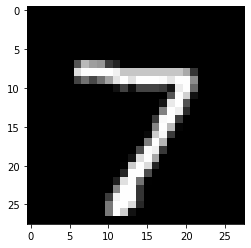

In [10]:
drawImg(x_test[0])

In [11]:
def distance(x1,x2):
    return np.sqrt((sum((x1-x2)**2)))

def knn(X,Y,quarry_x,k=5):
    vals=[]
    m=X.shape[0]
   # print(m)
    
    for i in range(m):
        d=distance(quarry_x,X[i])
        vals.append((d,Y[i]))
    
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
   # print(new_vals)
    freq=new_vals[1].argmax()
    #vals=np.array(vals)
    prediction=new_vals[0][freq]
    return prediction
   

In [12]:
pred=knn(x_train,y_train,x_test[1])
print(int(pred))

2


2


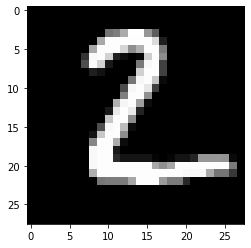

In [13]:
drawImg(x_test[1])
print(y_test[1])
#print(len(x_test))

In [19]:
num=0
for i in range(10):
    pred=int(knn(x_train,y_train,x_test[i]))
    print(pred,y_test[i])
    if pred==y_test[i]:
        num+=1
num=num/len(x_test)
print("accuracy:%f"%num)
    

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
accuracy:0.001000
